In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
pd.set_option('display.max_rows',2000)

In [3]:
pd.set_option('display.max_colwidth', 200)

In [4]:
df = pd.read_csv('execution_database.csv')
df.head()

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/10/1986,James Roach,25,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland
1,01/11/1985,Joseph Shaw,29,m,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland
2,01/08/1997,Paul Ruiz,49,m,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan
3,01/08/1997,Earl Van Denton,47,m,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada
4,01/06/1994,Keith Wells,31,m,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada


## Work done
Among countries applying capital punishment worldwide, US is the only Western country which keeps authorizing and applying the death penalty. Claims and predictions about the upcoming “death of death penalty” have been published (http://time.com/deathpenalty/), but it doesn’t seem to be proven real. To explore death penalty in US overtime, I searched online and I found an execution database provided and published by the “Death Penalty Information Center” (https://deathpenaltyinfo.org/views-executions), including data for executions from 1977 onwards. 

My cleaning and transforming work basically includes the following:

-Extracting year from each date of execution provided in a given column “Date”

-Creating a new column for the year of each execution

-Creating a new column for the decade which year values correspond to

-Replacing gender abbreviations with new gender values in a given column “Sex”, which refers to the gender of prisoners executed

-Replacing states and region abbreviations in new columns created for state and regions names


After that, I did some analysis to discover:

-Most active states in terms of applying death penalty

-Age and gender of executed prisoners

-Most common methods of death penalty used 

-How all of the above have been changing during the years


# Findings

Texas, Virginia and Oklahoma are the US states which mostly apply the death penalty; specifically, Texas seems to be historically the top state applying the capital punishment, counting 552 executions out of 1477 in total (37.4%). Between the years 2000 and 2010, executions seem to increase in comparison to ‘90s, before decreasing again from 2010 onwards. Prisoners probably increase their living days, since mean age keeps being greater than in the past: In ‘10s, prisoners’ mean age is the greatest one (46.7 years old), while mean age is just 35.5 years old in ’80s. Taking into account the total research sample, mean age is 41.6 years old. In Virginia, Utah, Texas and more, executed prisoners’ mean age is lower than the total average. Lethal injection is the most common method of execution (88.2%), having been developed from 1990 onwards. Before that, electrocution had been the most common method applied, reaching more than 70% of cases in ‘80s, when lethal injection was used by 42%.



## “Nice to have” improvements

-Cleaning and analysis on victims’ data

-Graphics for all major parts of analysis

-Further work on existing graphics styling 

-Find a styling pattern to apply in all project’s graphic (consistency improvement)

-Add legends to some existing graphics

-Figure out exactly how “sort values” combined with “head” work; correct/ improve possible affected graphics


### Cleaning and Transforming

In [5]:
df.columns = df.columns.str.replace(' / ', '_')

In [6]:
df.columns = df.columns.str.replace('\s+', '_')

In [7]:
df['year'] = df['Date'].str.extract(r"\d+/\d+/(\d+)", re.IGNORECASE)
#df['year']

In [8]:
df.dtypes

Date                          object
Name                          object
Age                            int64
Sex                           object
Race                          object
Number_Race_Sex_of_Victims    object
State                         object
Region                        object
Method                        object
Juvenile                      object
Federal                       object
Volunteer                     object
Foreign_National              object
County                        object
year                          object
dtype: object

In [9]:
df['year'] = df.year.fillna(0).astype(int)

In [10]:
def get_decades(row):
    if row['year'] >= int(1970) and row['year'] <int(1980):
        val='70s'
    elif row['year'] >= int(1980) and row['year'] <int(1990):
        val='80s'
    elif row['year'] >= int(1990) and row['year'] <int(2000):
        val='90s'
    elif row['year'] >= int(2000) and row['year'] <int(2010):
        val='00s'
    elif row['year'] >= int(2010):
        val='10s'
    else:
        val='unknown year'
    return val

In [11]:
df['decade'] = df.apply(get_decades,axis = 1)

In [12]:
df['Sex'].replace('m','Male',inplace=True)
df['Sex'].replace('f','Female',inplace=True)

In [13]:
df = df.rename(columns={'State': 'State_Abbreviations'})
                       #'Region':'Region_Abbreviations'})

In [14]:
df.head()

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region,Method,Juvenile,Federal,Volunteer,Foreign_National,County,year,decade
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland,1986,80s
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland,1985,80s
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan,1997,90s
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada,1997,90s
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada,1994,90s


In [15]:
df['State'] = df.State_Abbreviations.replace(
    {'SC': "South Carolina",
    'AR': "Arkansas",
    'ID': "Idaho",
    'VA': "Virginia",
    'TX': 'Texas',
    'WA': 'Washington',
    'LA': 'Lousiana',
    'MO': 'Missouri',
    'OK': 'Oklahoma',
    'GA': 'Georgia',
    'FL': 'Florida',
    'CA': 'California',
     'AZ': 'Arizona',
     'OH': 'Ohio',
     'AL': 'Alabama',
     'IN': 'Indiana',
     'NC': 'North Carolina',
     'DE': 'Delaware',
     'IL': 'Ilinois',
     'PA': 'Pennsylvania',
     'MT': 'Montana',
     'MS': 'Mississippi',
     'NV': 'Nevada',
     'UT': 'Utah',
     'TN': 'Tennessee',
     'MD': 'Maryland',
     'KY': 'Kentacky',
     'SD': 'South Dakota',
     'NE': 'Nebraska',
     'OR': 'Oregon',
     'CO': 'Colorado',
     'CT': 'Connecticut',
     'NM': 'New Mexico',
     'WY': 'Wyoming',
     'FE': 'FE'
})

In [16]:
df = df.rename(columns={'Region':'Region_Abbreviations'})

In [17]:
df['Region'] = df.Region_Abbreviations.replace(
    {'S': "South",
    'W': "West",
    'N': "Northeast",
    'M': "Midwest"})

In [18]:
df

,Date,Name,Age,Sex,Race,Number_Race_Sex_of_Victims,State_Abbreviations,Region_Abbreviations,Method,Juvenile,Federal,Volunteer,Foreign_National,County,year,decade,State,Region
0,01/10/1986,James Roach,25,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,Yes,No,No,No,Richland,1986,80s,South Carolina,South
1,01/11/1985,Joseph Shaw,29,Male,White,1 White Male(s)1 White Female(s),SC,S,Electrocution,No,No,No,No,Richland,1985,80s,South Carolina,South
2,01/08/1997,Paul Ruiz,49,Male,Latino,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Logan,1997,90s,Arkansas,South
3,01/08/1997,Earl Van Denton,47,Male,White,2 White Male(s),AR,S,Lethal Injection,No,No,No,No,Nevada,1997,90s,Arkansas,South
4,01/06/1994,Keith Wells,31,Male,White,1 White Male(s)1 White Female(s),ID,W,Lethal Injection,No,No,Yes,No,Ada,1994,90s,Idaho,West
5,01/10/2000,Douglas Thomas,26,Male,White,2 White Male(s),VA,S,Lethal Injection,Yes,No,No,No,Middlesex,2000,00s,Virginia,South
6,01/12/2000,Earl Heiselbertz,48,Male,White,2 White Female(s),TX,S,Lethal Injection,No,No,No,No,Sabine,2000,00s,Texas,South
7,01/05/1993,Westley Dodd,31,Male,White,3 White Male(s),WA,W,Hanging,No,No,Yes,No,Clark,1993,90s,Washington,West
8,01/04/1985,David Martin,32,Male,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish,1985,80s,Lousiana,South
9,01/09/2002,James Johnson,52,Male,White,2 White Male(s)2 White Female(s),MO,M,Lethal Injection,No,No,No,No,Moniteau,2002,00s,Missouri,Midwest


In [19]:
df.to_csv("executions_kelly.csv", index=False)

### Some analysis and graphics

In [20]:
df.State.value_counts()

Texas             552
Virginia          113
Oklahoma          112
Florida            96
Missouri           88
Georgia            72
Alabama            63
Ohio               55
North Carolina     43
South Carolina     43
Arizona            37
Arkansas           31
Lousiana           28
Mississippi        21
Indiana            20
Delaware           16
California         13
Nevada             12
Ilinois            12
Utah                7
Tennessee           6
Maryland            5
Washington          5
Idaho               3
FE                  3
South Dakota        3
Montana             3
Kentacky            3
Pennsylvania        3
Nebraska            3
Oregon              2
Connecticut         1
New Mexico          1
Wyoming             1
Colorado            1
Name: State, dtype: int64

In [21]:
df.State.count()

1477

In [22]:
round(df.State.value_counts(normalize=True)*100,1).head(10)

Texas             37.4
Virginia           7.7
Oklahoma           7.6
Florida            6.5
Missouri           6.0
Georgia            4.9
Alabama            4.3
Ohio               3.7
North Carolina     2.9
South Carolina     2.9
Name: State, dtype: float64

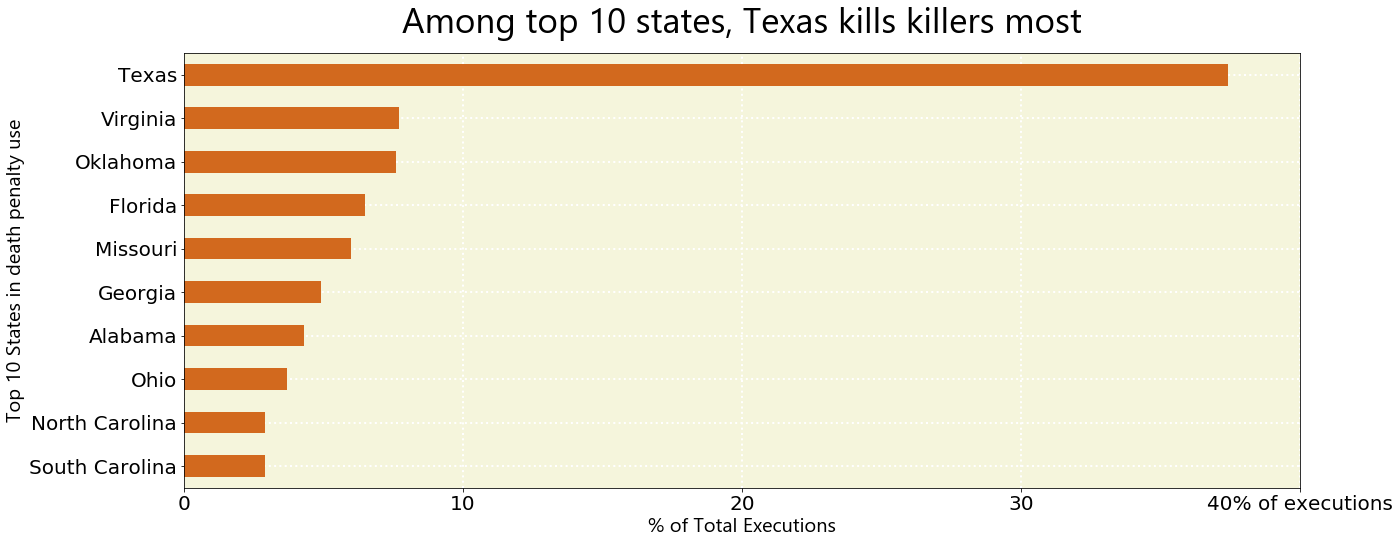

In [23]:
#states = df.State.value_counts(normalize=True).head(10).plot(kind='bar',figsize=(30,10))
states = round(df.State.value_counts(ascending=True, normalize=True)*100,1)
graph = states.tail(10).plot(kind='barh',figsize=(20,8), color='chocolate')

graph.set_title('Among top 10 states, Texas kills killers most',fontsize=35,fontname="Nirmala UI",pad=20)
graph.tick_params(axis='both', labelsize=20)

graph.set_xticks([0,10,20,30,40])
graph.set_xticklabels(['0','10','20','30','40% of executions'])

graph.set_xlabel('% of Total Executions',fontsize=20,fontname="Nirmala UI")
graph.set_ylabel('Top 10 States in death penalty use',fontsize=20,fontname="Nirmala UI")

graph.grid(True)
graph.set_axisbelow(True)
graph.set_facecolor('beige')
graph.grid(True,axis='both',color='white',linestyle=':',linewidth=2)

#graph.yaxis.label.set_visible(True)

In [24]:
df.groupby('decade').State.value_counts().sort_values(ascending=False).head(10)

decade  State   
00s     Texas       248
90s     Texas       166
10s     Texas       105
00s     Oklahoma     72
90s     Virginia     65
        Missouri     40
80s     Texas        33
00s     Virginia     32
        Ohio         32
10s     Florida      28
Name: State, dtype: int64

In [25]:
top_by_decade = df.groupby('State').decade.value_counts().sort_values(ascending=False).head(5).unstack().reset_index().fillna(0)
top_by_decade

decade,State,00s,90s,10s
0,Texas,248.0,166.0,105.0
1,Oklahoma,72.0,0.0,0.0
2,Virginia,0.0,65.0,0.0


In [26]:
round(df.groupby('State').Age.mean(),1).sort_values(ascending=True).head(5)

State
Lousiana    34.9
Virginia    35.9
Delaware    37.1
Utah        37.7
Texas       39.5
Name: Age, dtype: float64

In [27]:
round(df.groupby('State').Age.mean(),1).sort_values(ascending=False).head(5)

State
Oregon          56.0
Colorado        53.0
Tennessee       50.2
California      49.8
Pennsylvania    48.7
Name: Age, dtype: float64

In [28]:
round(df.Age.mean(),1)

41.6

In [29]:
ages = round(df.groupby('State').Age.mean(),1).reset_index(name='mean_age')
ages

,State,mean_age
0,Alabama,45.7
1,Arizona,47.2
2,Arkansas,43.1
3,California,49.8
4,Colorado,53.0
5,Connecticut,45.0
6,Delaware,37.1
7,FE,43.3
8,Florida,46.7
9,Georgia,45.9


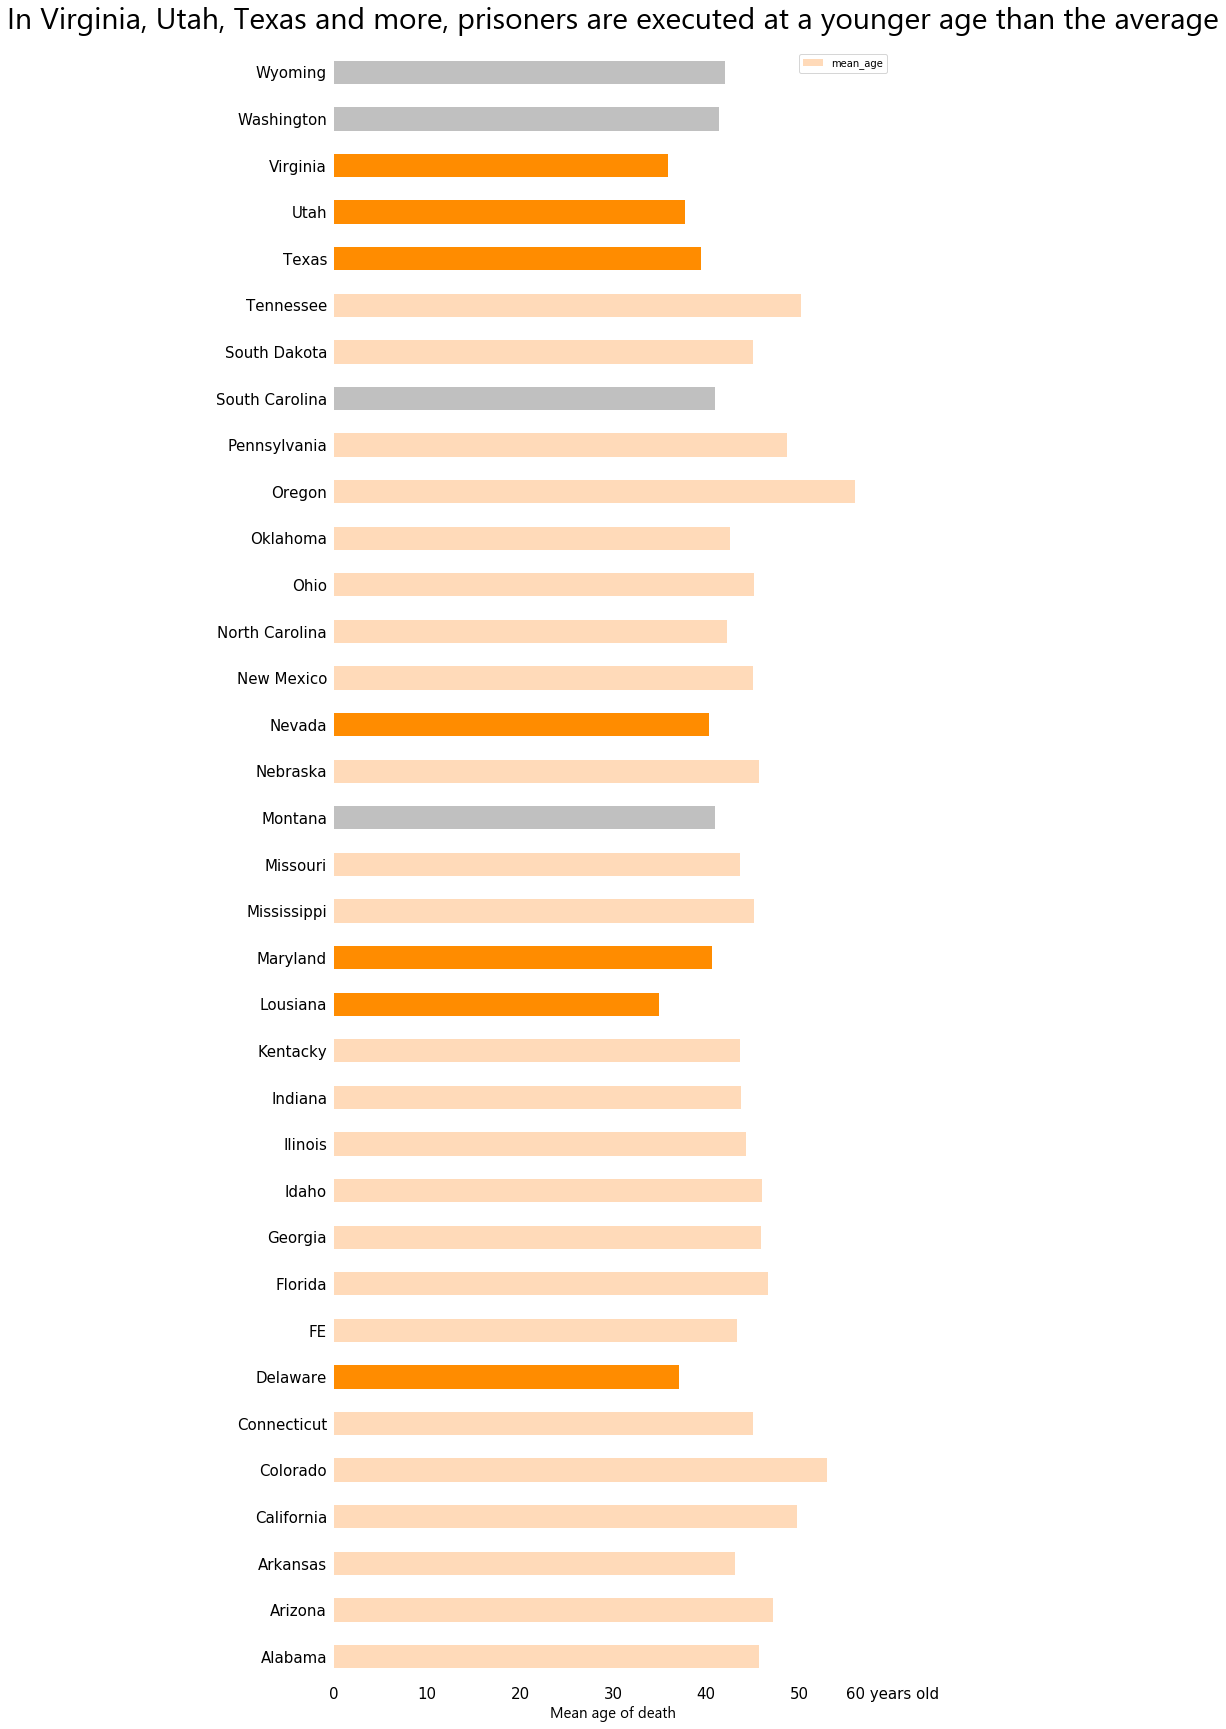

In [30]:
def get_color(mean_age):
    if mean_age < 41:
        return 'darkorange'
    elif mean_age >=41 and mean_age<=42:
        return 'silver'
    else:
        return 'peachpuff'

bar_colors = [get_color(mean_age) for mean_age in ages.mean_age]

ax = ages.plot(x='State', y='mean_age', kind='barh', color=bar_colors, figsize=(10,30))

ax.set_title('In Virginia, Utah, Texas and more, prisoners are executed at a younger age than the average',fontsize=30,fontname="Nirmala UI",pad=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Mean age of death',fontsize=15,fontname="Nirmala UI")
#ax.set_ylabel('',fontsize=15,fontname="Nirmala UI")

ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels(['0','10', '20','30','40','50','60 years old'])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major',left=False,bottom=False,grid_alpha=0.5)
#ax.set_facecolor('lightgrey')

#ax.grid(True,axis='x',color='white',linestyle=':',linewidth=1)
#ax.set_axisbelow(True)
#ax.set_xlim(0,60)

ax.yaxis.label.set_visible(False)

In [31]:
df.decade.value_counts()

00s             590
90s             478
10s             289
80s             117
70s               3
unknown year      2
Name: decade, dtype: int64

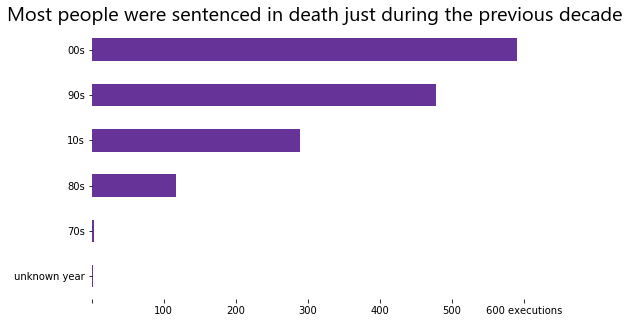

In [32]:
decades = df.decade.value_counts(ascending=True).plot(x='country',kind='barh', figsize=(8,5), color='rebeccapurple')

decades.set_xticklabels(['','100','200','300','400','500','600 executions'])

decades.spines['top'].set_visible(False)
decades.spines['left'].set_visible(False)
decades.spines['bottom'].set_visible(False)
decades.spines['right'].set_visible(False)

decades.set_title('Most people were sentenced in death just during the previous decade')
decades.title.set_fontsize(20)
decades.title.set_fontname("Nirmala UI")

In [33]:
round(df.Age.mean(),1)

41.6

In [34]:
round(df.groupby('decade').Age.mean(),1)

decade
00s             41.8
10s             46.7
70s             37.3
80s             35.5
90s             40.1
unknown year     0.0
Name: Age, dtype: float64

In [35]:
df.Race.value_counts()

White              821
Black              507
Latino             124
Native American     16
Asian                7
Other                2
Name: Race, dtype: int64

In [36]:
df.groupby('decade').Race.value_counts()

decade  Race           
00s     White              331
        Black              202
        Latino              46
        Native American      7
        Asian                2
        Other                2
10s     White              156
        Black               94
        Latino              38
        Native American      1
70s     White                3
80s     White               61
        Black               49
        Latino               7
90s     White              270
        Black              162
        Latino              33
        Native American      8
        Asian                5
Name: Race, dtype: int64

In [37]:
round(df.groupby('decade').Race.value_counts(normalize=True)*100,1)

decade  Race           
00s     White               56.1
        Black               34.2
        Latino               7.8
        Native American      1.2
        Asian                0.3
        Other                0.3
10s     White               54.0
        Black               32.5
        Latino              13.1
        Native American      0.3
70s     White              100.0
80s     White               52.1
        Black               41.9
        Latino               6.0
90s     White               56.5
        Black               33.9
        Latino               6.9
        Native American      1.7
        Asian                1.0
Name: Race, dtype: float64

In [38]:
top_by_race = df.groupby('State').Race.value_counts().sort_values(ascending=False).head(3).unstack().reset_index().fillna(0)
top_by_race

Race,State,White,Black,Latino
0,Texas,242,201,105


In [39]:
#top_by_race_pct = df.groupby('State').Race.value_counts(normalize=True*100).sort_values(ascending=False).head(10).unstack().reset_index().fillna(0)
#top_by_race_pct

In [40]:
df.Method.value_counts()

Lethal Injection    1302
Electrocution        158
Gas Chamber           11
Hanging                3
Firing Squad           3
Name: Method, dtype: int64

In [41]:
round(df.Method.value_counts(normalize=True)*100,1)

Lethal Injection    88.2
Electrocution       10.7
Gas Chamber          0.7
Hanging              0.2
Firing Squad         0.2
Name: Method, dtype: float64

In [42]:
by_method = df.groupby('decade').Method.value_counts().sort_values(ascending=False).unstack().reset_index().fillna(0)
by_method

Method,decade,Electrocution,Firing Squad,Gas Chamber,Hanging,Lethal Injection
0,00s,12.0,0.0,0.0,0.0,578.0
1,90s,72.0,1.0,6.0,3.0,396.0
2,10s,2.0,1.0,0.0,0.0,286.0
3,80s,71.0,0.0,4.0,0.0,42.0
4,70s,1.0,1.0,1.0,0.0,0.0


In [43]:
method_by_decade = df.groupby('Method').decade.value_counts().sort_values(ascending=False).unstack().reset_index().fillna(0)
method_by_decade

decade,Method,00s,10s,70s,80s,90s
0,Electrocution,12.0,2.0,1.0,71.0,72.0
1,Firing Squad,0.0,1.0,1.0,0.0,1.0
2,Gas Chamber,0.0,0.0,1.0,4.0,6.0
3,Hanging,0.0,0.0,0.0,0.0,3.0
4,Lethal Injection,578.0,286.0,0.0,42.0,396.0


In [44]:
state_method = df.groupby('State').Method.value_counts().sort_values(ascending=False).unstack().reset_index().fillna(0)
state_method

Method,State,Electrocution,Firing Squad,Gas Chamber,Hanging,Lethal Injection
0,Alabama,24.0,0.0,0.0,0.0,39.0
1,Arizona,0.0,0.0,2.0,0.0,35.0
2,Arkansas,1.0,0.0,0.0,0.0,30.0
3,California,0.0,0.0,2.0,0.0,11.0
4,Colorado,0.0,0.0,0.0,0.0,1.0
5,Connecticut,0.0,0.0,0.0,0.0,1.0
6,Delaware,0.0,0.0,0.0,1.0,15.0
7,FE,0.0,0.0,0.0,0.0,3.0
8,Florida,44.0,0.0,0.0,0.0,52.0
9,Georgia,23.0,0.0,0.0,0.0,49.0


### Some work to get victims - to be continued...

In [45]:
victims_1 = df.Number_Race_Sex_of_Victims.str.extract(r"^(\d+)", re.IGNORECASE)
victims_1

,0
0,1
1,1
2,2
3,2
4,1
5,2
6,2
7,3
8,2
9,2


In [46]:
victims_2 = df.Number_Race_Sex_of_Victims.str.extract(r"[)](\d+) \w+", re.IGNORECASE)
victims_2

,0
0,1
1,1
2,NaN
3,NaN
4,1
5,NaN
6,NaN
7,NaN
8,2
9,2


In [47]:
victims_3 = df.Number_Race_Sex_of_Victims.str.extract(r"s[)].*[(]s[)](\d+)", re.IGNORECASE)
victims_3

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [48]:
df['decade'].value_counts()

00s             590
90s             478
10s             289
80s             117
70s               3
unknown year      2
Name: decade, dtype: int64

In [49]:
df['State'].value_counts()

Texas             552
Virginia          113
Oklahoma          112
Florida            96
Missouri           88
Georgia            72
Alabama            63
Ohio               55
North Carolina     43
South Carolina     43
Arizona            37
Arkansas           31
Lousiana           28
Mississippi        21
Indiana            20
Delaware           16
California         13
Nevada             12
Ilinois            12
Utah                7
Tennessee           6
Maryland            5
Washington          5
Idaho               3
FE                  3
South Dakota        3
Montana             3
Kentacky            3
Pennsylvania        3
Nebraska            3
Oregon              2
Connecticut         1
New Mexico          1
Wyoming             1
Colorado            1
Name: State, dtype: int64